In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:

train_home_team_statistics_df = pd.read_csv('./Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('./Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('./Y_train.csv', index_col=0)
train_home = train_home_team_statistics_df.iloc[:,2:] #On enlève le nom de l'équipe et de la compétition
train_away = train_away_team_statistics_df.iloc[:,2:]
train_home.columns = 'HOME_' + train_home.columns #on rajoute aux noms des variables home et away pour pouvoir ensuite concaténer
train_away.columns = 'AWAY_' + train_away.columns
train_data =  pd.concat([train_home,train_away],join='inner',axis=1) #on effectue une jointure pour obtenir qu'une seule table avec les infos de away et de home 
print(f"nombre de ligne de train_data: {train_data.shape[0]}")
print(f"nombre de ligne de train_scores actuellement : {train_scores.shape[0]}")
train_scores = train_scores.loc[train_data.index] #alligne les données entre les 2 structures
print(f"nombre de ligne de train_scores après allignement : {train_scores.shape[0]}")
train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan}) # Remplacement des valeurs infinies par NaN



test_home = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)



print(test_data)

test_data.iloc[:, :5].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogrammes des premières colonnes')
plt.show()



# X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_scores, train_size=0.8, random_state=42)
# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)


nombre de ligne de train_data: 12303
nombre de ligne de train_scores actuellement : 12303
nombre de ligne de train_scores après allignement : 12303


NameError: name 'np' is not defined

## Étape 1 : Heatmaps pour les groupes de colonnes spécifiques


Étape 4 : Heatmaps spécifiques


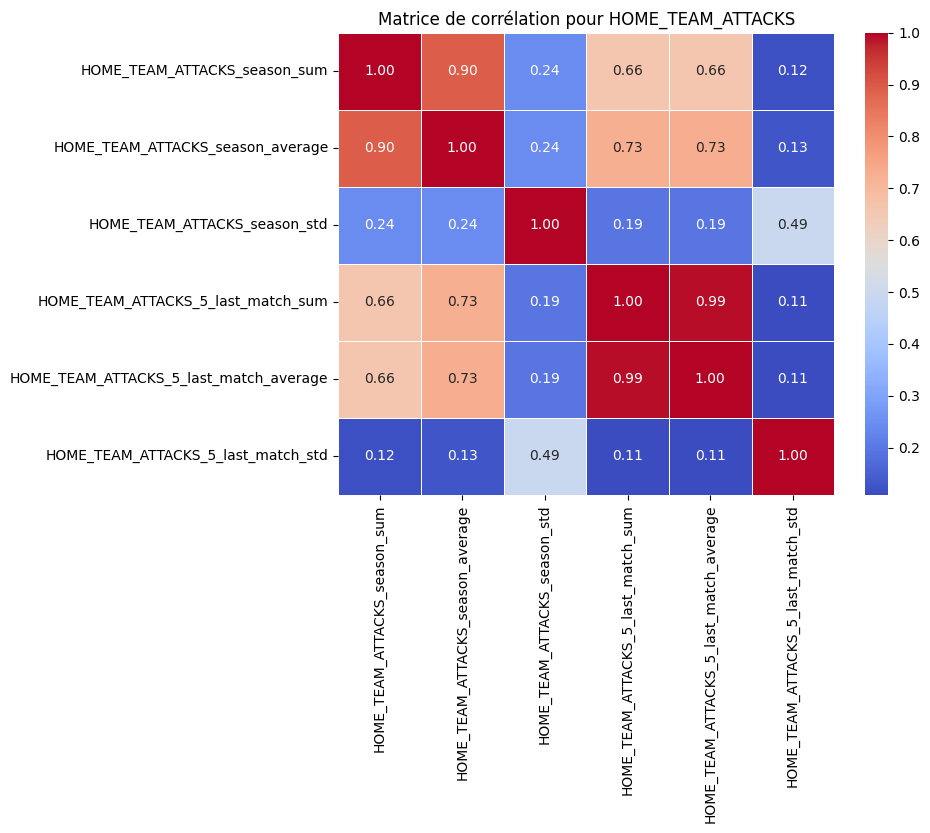

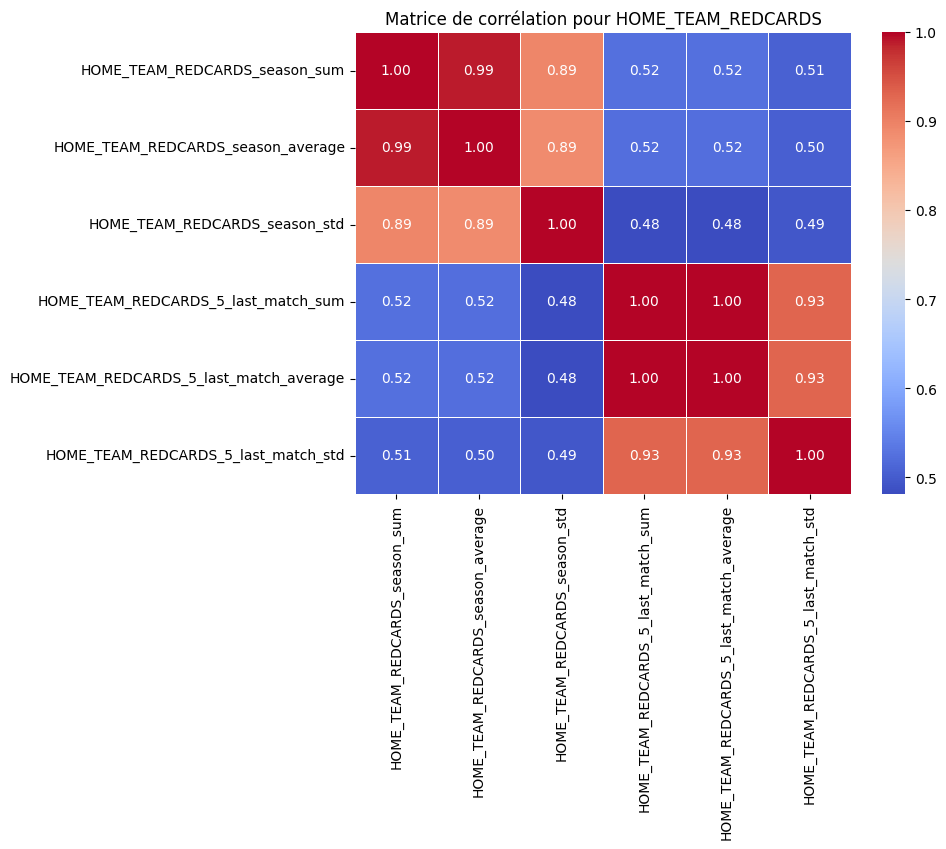

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



def plot_correlation_heatmap(df, filter_keyword, title):
    """
    Trace une heatmap pour les colonnes contenant un mot-clé spécifique.

    Arguments :
    - df : DataFrame à traiter
    - filter_keyword : Mot-clé pour filtrer les colonnes (par exemple, "HOME_TEAM_ATTACKS")
    - title : Titre du graphique
    """
    filtered_columns = [col for col in df.columns if filter_keyword in col]
    filtered_corr_matrix = df[filtered_columns].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

print("\nÉtape 4 : Heatmaps spécifiques")
plot_correlation_heatmap(train_data, filter_keyword="HOME_TEAM_ATTACKS", title="Matrice de corrélation pour HOME_TEAM_ATTACKS")
plot_correlation_heatmap(train_data, filter_keyword="HOME_TEAM_REDCARDS", title="Matrice de corrélation pour HOME_TEAM_REDCARDS")


## Etape 2 : SUppression des colonnes trop corrélées (corr > 0.8)

In [6]:

def drop_highly_correlated_features(df, threshold=0.8, df_name="Dataset"):
    """
    Supprime les colonnes avec une corrélation supérieure au seuil donné.

    Arguments :
    - df : DataFrame à traiter
    - threshold : Seuil de corrélation
    - df_name : Nom du DataFrame (optionnel, pour affichage)

    Retourne :
    - Le DataFrame avec les colonnes fortement corrélées supprimées
    """
    correlation_matrix = df.corr()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    print(f"\n=== {df_name} ===")
    print(f"Colonnes supprimées en raison d'une forte corrélation : {to_drop}")
    print(len(to_drop))

    return df.drop(columns=to_drop)




print("\nÉtape 2 : Suppression des colonnes fortement corrélées")
train_data = drop_highly_correlated_features(train_data, threshold=0.8, df_name="Train Data")
test_data = drop_highly_correlated_features(test_data, threshold=0.8, df_name="Test Data")



Étape 2 : Suppression des colonnes fortement corrélées

=== Train Data ===
Colonnes supprimées en raison d'une forte corrélation : ['HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_FOULS_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_REDCARDS_season_average', 'HOME_TEAM_OFFSIDES_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_PENALTIES_season_average', 'HOME_TEAM_SUBSTITUTIONS_season_average', 'HOME_TEAM_DANGEROUS_ATTACKS_season_average', 'HOME

## Remplacemeent des valeurs manquantes et rajout d'une variable binaire si il manque une valeur

In [7]:
# Fonction pour ajouter des indicateurs de données manquantes
def add_missing_indicators_and_fill(df, df_name="Dataset"):
    
    # Identifier les colonnes avec des valeurs manquantes
    missing_cols = df.columns[df.isnull().any()]
    print(f"\n=== {df_name} ===")
    print(f"Colonnes avec données manquantes : {len(missing_cols)}")
    print(missing_cols)

    # Ajouter une colonne binaire pour chaque colonne avec des valeurs manquantes
    # for col in missing_cols:
    #     df[f"{col}_missing"] = df[col].isnull().astype(int)

    # Remplacer les valeurs manquantes par la moyenne
    df.fillna(df.mean(), inplace=True)

    # Vérification des données manquantes après traitement
    total_missing = df.isnull().sum().sum()
    print(f"Valeurs manquantes restantes après traitement : {total_missing}")

    return df

# Appliquer la fonction aux datasets
train_data = add_missing_indicators_and_fill(train_data, df_name="Train Data")
test_data = add_missing_indicators_and_fill(test_data, df_name="Test Data")

# Vérification des colonnes ajoutées
print("\nColonnes ajoutées dans train_data :")
print([col for col in train_data.columns if "_missing" in col])

print("\nColonnes ajoutées dans test_data :")
print([col for col in test_data.columns if "_missing" in col])



=== Train Data ===
Colonnes avec données manquantes : 128
Index(['HOME_TEAM_SHOTS_TOTAL_season_sum',
       'HOME_TEAM_SHOTS_ON_TARGET_season_sum',
       'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum',
       'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum',
       'HOME_TEAM_FOULS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum',
       'HOME_TEAM_REDCARDS_season_sum', 'HOME_TEAM_OFFSIDES_season_sum',
       ...
       'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std',
       'AWAY_TEAM_SAVES_5_last_match_std',
       'AWAY_TEAM_BALL_POSSESSION_5_last_match_std',
       'AWAY_TEAM_FOULS_5_last_match_std',
       'AWAY_TEAM_YELLOWCARDS_5_last_match_std',
       'AWAY_TEAM_OFFSIDES_5_last_match_std',
       'AWAY_TEAM_SUBSTITUTIONS_5_last_match_std',
       'AWAY_TEAM_BALL_SAFE_5_last_match_std',
       'AWAY_TEAM_INJURIES_5_last_match_std',
       'AWAY_TEAM_GOALS_5_last_match_std'],
      dtype='object', length=128)
Valeurs manquantes resta

In [26]:
print(train_data)

       HOME_TEAM_SHOTS_TOTAL_season_sum  \
ID                                        
0                                   3.0   
1                                   6.0   
2                                   4.0   
3                                   7.0   
4                                   3.0   
...                                 ...   
12298                               4.0   
12299                               4.0   
12300                               4.0   
12301                               2.0   
12302                               2.0   

       HOME_TEAM_SHOTS_OFF_TARGET_season_sum  \
ID                                             
0                                        5.0   
1                                        3.0   
2                                        5.0   
3                                        5.0   
4                                        2.0   
...                                      ...   
12298                                    3.0   
12299   

In [75]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_scores, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)


# On va maintenant appliquer XGboost en utilisant les hyperparametres trouvées avec l'autre note book, à savoir : 'learning_rate': 0.01, 'max_depth': 3

### Avec xgb.train

In [76]:

print(len(y_train))
print(len(X_train))

7873
7873


### Si l'on souhaite appliquer notre modèle avec victoire - nul - défaite, on doit utiliser les lignes de codes suivantes : sinon on utilise celle d'en dessous

In [ ]:
y_train = np.argmax(y_train.values, axis=1) #nécessaire pour correspondre au format de xgboost
y_valid = np.argmax(y_valid.values, axis=1)

#Cette méthode a des moins bons résultats qu'une classification binaire 

In [77]:
y_train = y_train['AWAY_WINS']
y_valid = y_valid['AWAY_WINS']

print(y_train)
print(y_test)

ID
10848    1
4722     0
854      0
6445     0
9102     0
        ..
11467    0
10736    0
5300     0
6378     0
10052    0
Name: AWAY_WINS, Length: 7873, dtype: int64
       HOME_WINS  DRAW  AWAY_WINS
ID                               
8961           1     0          0
724            0     0          1
9165           0     0          1
12165          0     0          1
8771           1     0          0
...          ...   ...        ...
8288           0     1          0
3378           0     1          0
4007           0     0          1
9037           0     0          1
549            0     1          0

[2461 rows x 3 columns]


In [78]:


params_1 = {
    'booster': 'gbtree', #Utilise des arbres de décision comme base (classic choice for many problems).
    'tree_method':'hist', #Utilise une approche basée sur des histogrammes pour accélérer l'entraînement, particulièrement efficace pour les grands ensembles de données.
    'max_depth': 3, #Contrôle la profondeur maximale des arbres.
    'learning_rate': 0.01,
    'objective': 'multi:softprob', #cela indique que le modèle doit effectuer une classification multi-classes et renvoyer les probabilités pour chaque classe.
    'num_class': 2, #On se contente juste de savoir qui gagne, sans prendre en compte les cas d'égalité pour le moment
    'eval_metric':'mlogloss'
    }



d_train = xgb.DMatrix(X_train, y_train) #X (features) : Données combinées des statistiques des équipes à domicile et à l'extérieur.
                                                            #y (labels) : Résultats des matchs codés comme 0 (victoire domicile), 1 (match nul), ou 2 (victoire extérieur).
d_valid = xgb.DMatrix(X_valid, y_valid)

num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]


bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100)


[0]	train-mlogloss:0.69114	eval-mlogloss:0.69114
[1]	train-mlogloss:0.68918	eval-mlogloss:0.68919
[2]	train-mlogloss:0.68726	eval-mlogloss:0.68726
[3]	train-mlogloss:0.68537	eval-mlogloss:0.68538
[4]	train-mlogloss:0.68352	eval-mlogloss:0.68353
[5]	train-mlogloss:0.68172	eval-mlogloss:0.68170
[6]	train-mlogloss:0.67994	eval-mlogloss:0.67992
[7]	train-mlogloss:0.67821	eval-mlogloss:0.67817
[8]	train-mlogloss:0.67649	eval-mlogloss:0.67645
[9]	train-mlogloss:0.67483	eval-mlogloss:0.67477
[10]	train-mlogloss:0.67318	eval-mlogloss:0.67315
[11]	train-mlogloss:0.67157	eval-mlogloss:0.67150
[12]	train-mlogloss:0.66998	eval-mlogloss:0.66995
[13]	train-mlogloss:0.66843	eval-mlogloss:0.66838
[14]	train-mlogloss:0.66691	eval-mlogloss:0.66685
[15]	train-mlogloss:0.66541	eval-mlogloss:0.66535
[16]	train-mlogloss:0.66395	eval-mlogloss:0.66390
[17]	train-mlogloss:0.66251	eval-mlogloss:0.66240
[18]	train-mlogloss:0.66109	eval-mlogloss:0.66100
[19]	train-mlogloss:0.65966	eval-mlogloss:0.65955
[20]	train

## dernière valeur: 0.55806 (avec variable binaire), 0.55829 (sans)

In [85]:
target = train_scores.loc[X_test.index].copy()

X_test_xgb = xgb.DMatrix(X_test) 

predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int).values
res = np.round(accuracy_score(predictions,target),4)

print(f"le résultat lorsqu'on prédit avec notre modèle 'basique' + néttoyage des données, entrainé : {res}")

le résultat lorsqu'on prédit avec notre modèle 'basique' + néttoyage des données, entrainé : 0.473


## score : 0.4722

## Submission

In [86]:

test_home = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)


def preprocess_test_data(test_data, train_data):
    # Imputer avec les moyennes de train_data
    mean_values = train_data.mean()
    test_data_filled = test_data.fillna(mean_values)

    # # Aligner les colonnes avec celles de train_data
    test_data_aligned = test_data_filled[train_data.columns]

    return test_data_aligned

# Préparer test_data
test_data_prepared = preprocess_test_data(test_data, train_data)




X_bench = xgb.DMatrix(test_data_prepared)

predictions = bst.predict(X_bench, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data_prepared.index
submission = predictions.reset_index()
submission.to_csv('./benchmark2_submission_test1.csv', index=False)


### XGBoost presentation
The model we used is Extreme Gradient Boosting, which is a popular and efficient gradient boosting algorithm. We used the XGBClassifier class from the xgboost package.

XGBoost is a powerful implementation of the gradient boosting algorithm, which is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

The package already implements the two following ensemble methods, so that we did not have to implement them ourselves:

Bagging: It is a technique that aims to reduce the variance of an estimate. It is a special case of the model averaging approach. Bagging is short for bootstrap aggregating. It works by taking many bootstrapped samples from the training data and training a separate model for each sample. The final prediction is then made by averaging the predictions of all models.

Boosting: It is a technique that aims to reduce the bias of an estimate. Boosting works by training a sequence of models, each of which learns to fix the prediction errors of the previous model in the sequence. The final prediction is then made by averaging the predictions of all models.



# Cross validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
from xgboost import XGBClassifier

# Charger les données
test_home = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data = pd.concat([test_home, test_away], join='inner', axis=1)

# Fonction pour prétraiter test_data
def preprocess_test_data(test_data, train_data):
    # Imputer avec les moyennes de train_data
    mean_values = train_data.mean()
    test_data_filled = test_data.fillna(mean_values)

    # Ajouter les colonnes binaires pour les données manquantes
    missing_columns = train_data.columns[train_data.isnull().any()]
    for col in missing_columns:
        if col not in test_data.columns:
            test_data[col] = 0
        test_data_filled[f"{col}_missing"] = test_data[col].isnull().astype(int)

    # Ajouter toutes les colonnes manquantes dans test_data
    for col in train_data.columns:
        if col not in test_data_filled.columns:
            test_data_filled[col] = 0

    # Aligner les colonnes avec celles de train_data
    test_data_aligned = test_data_filled[train_data.columns]

    return test_data_aligned

# Paramètres du modèle
params = {
    'booster': 'gbtree',
    'tree_method': 'hist',
    'max_depth': 3,
    'learning_rate': 0.01,
    'objective': 'multi:softprob',  # Pour classification multi-classes
    'num_class': 2,  # Nombre de classes
    'eval_metric': 'mlogloss',
    'use_label_encoder': False
}

# Cross-validation avec StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_loss_scores = []
accuracy_scores = []

# Initialisation du modèle
xgb_model = XGBClassifier(**params, n_estimators=100)

# Boucle de cross-validation
for fold, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print(f"--- Fold {fold + 1} ---")
    
    # Séparer les données en train et validation pour ce fold
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    # Entraîner le modèle sur ce fold
    xgb_model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_valid_fold, y_valid_fold)],
        early_stopping_rounds=100,
        verbose=False
    )
    
    # Faire des prédictions sur le fold de validation
    y_valid_pred_proba = xgb_model.predict_proba(X_valid_fold)
    y_valid_pred = np.argmax(y_valid_pred_proba, axis=1)
    
    # Calculer les métriques
    log_loss_fold = log_loss(y_valid_fold, y_valid_pred_proba)
    accuracy_fold = accuracy_score(y_valid_fold, y_valid_pred)
    
    log_loss_scores.append(log_loss_fold)
    accuracy_scores.append(accuracy_fold)
    
    print(f"Log Loss pour ce fold : {log_loss_fold:.4f}")
    print(f"Accuracy pour ce fold : {accuracy_fold:.4f}")

# Résultats moyens de la cross-validation
print("\n--- Résultats moyens sur les folds ---")
print(f"Log Loss moyen : {np.mean(log_loss_scores):.4f} ± {np.std(log_loss_scores):.4f}")
print(f"Accuracy moyenne : {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")

# Prétraiter test_data pour faire des prédictions finales
test_data_prepared = preprocess_test_data(test_data, train_data)

# Faire des prédictions finales sur test_data
X_bench = xgb.DMatrix(test_data_prepared)
final_predictions_proba = xgb_model.predict_proba(test_data_prepared)
final_predictions = np.argmax(final_predictions_proba, axis=1)

# Générer le fichier de soumission
predictions = pd.DataFrame(final_predictions_proba, columns=["HOME_WINS", "AWAY_WINS"])




predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data.index
submission = predictions.reset_index()
submission.to_csv('./benchmark2_submission_crossvalidation.csv', index=False)


--- Fold 1 ---
Log Loss pour ce fold : 0.6035
Accuracy pour ce fold : 0.6997
--- Fold 2 ---
Log Loss pour ce fold : 0.6012
Accuracy pour ce fold : 0.7092
--- Fold 3 ---
Log Loss pour ce fold : 0.6059
Accuracy pour ce fold : 0.7016
--- Fold 4 ---
Log Loss pour ce fold : 0.6035
Accuracy pour ce fold : 0.7014
--- Fold 5 ---
Log Loss pour ce fold : 0.6052
Accuracy pour ce fold : 0.7065

--- Résultats moyens sur les folds ---
Log Loss moyen : 0.6039 ± 0.0016
Accuracy moyenne : 0.7037 ± 0.0036


# On va essayer de rajouter des variables correspondants au winrate et à l'elo 

In [ ]:

train_home_team_statistics_df = pd.read_csv('./Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('./Train_Data/train_away_team_statistics_df.csv', index_col=0)

train_scores = pd.read_csv('./Y_train.csv', index_col=0)


train_home = train_home_team_statistics_df.iloc[:,1:] #On enlève le nom de l'équipe et de la compétition
train_away = train_away_team_statistics_df.iloc[:,1:]
train_home.columns = 'HOME_' + train_home.columns #on rajoute aux noms des variables home et away pour pouvoir ensuite concaténer
train_away.columns = 'AWAY_' + train_away.columns
train_data =  pd.concat([train_home,train_away],join='inner',axis=1) #on effectue une jointure pour obtenir qu'une seule table avec les infos de away et de home 
print(f"nombre de ligne de train_data: {train_data.shape[0]}")
print(f"nombre de ligne de train_scores actuellement : {train_scores.shape[0]}")
train_scores = train_scores.loc[train_data.index] #alligne les données entre les 2 structures
print(f"nombre de ligne de train_scores après allignement : {train_scores.shape[0]}")
train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan}) # Remplacement des valeurs infinies par NaN

print("test")
print(train_data)





nombre de ligne de train_data: 12303
nombre de ligne de train_scores actuellement : 12303
nombre de ligne de train_scores après allignement : 12303
test
                HOME_TEAM_NAME  HOME_TEAM_SHOTS_TOTAL_season_sum  \
ID                                                                 
0                     Toulouse                               3.0   
1                        Brest                               6.0   
2                    Sampdoria                               4.0   
3                Coventry City                               7.0   
4      Wolverhampton Wanderers                               3.0   
...                        ...                               ...   
12298          Southend United                               4.0   
12299                 Boavista                               4.0   
12300               Schalke 04                               4.0   
12301           Fleetwood Town                               2.0   
12302                 Valencia 

In [43]:
import pandas as pd

def calcul_victory(data, score):
    team_victories = {}  # Nombre de victoires
    team_total_game = {}  # Total de matchs joués
    
    # Parcours des matchs à domicile
    for team, home_win in zip(data["HOME_TEAM_NAME"], score["HOME_WINS"]):
        team_total_game[team] = team_total_game.get(team, 0) + 1
        if home_win == 1:
            team_victories[team] = team_victories.get(team, 0) + 1

    # Parcours des matchs à l'extérieur
    for team, away_win in zip(data["AWAY_TEAM_NAME"], score["AWAY_WINS"]):
        team_total_game[team] = team_total_game.get(team, 0) + 1
        if away_win == 1:
            team_victories[team] = team_victories.get(team, 0) + 1

    return team_victories, team_total_game

def calcul_draw(data, score):
    team_draws = {}  # Nombre de matchs nuls

    # Parcours des matchs à domicile
    for team, draw in zip(data["HOME_TEAM_NAME"], score["DRAW"]):
        if draw == 1:
            team_draws[team] = team_draws.get(team, 0) + 1

    # Parcours des matchs à l'extérieur
    for team, draw in zip(data["AWAY_TEAM_NAME"], score["DRAW"]):
        if draw == 1:
            team_draws[team] = team_draws.get(team, 0) + 1

    return team_draws

def calcul_win_rate(victories, draws, totals):
    """
    Calcule le taux de victoire avec 0.5 * matchs nuls.
    """
    win_rates = {}
    for team in totals:
        win = victories.get(team, 0)
        draw = draws.get(team, 0)
        total = totals[team]
        win_rates[team] = (win + 0.5 * draw) / total if total > 0 else 0
    return win_rates

def winrate(data, score):
    # Calcul des victoires, matchs totaux et nuls
    victories, total_games = calcul_victory(data, score)
    draws = calcul_draw(data, score)
    
    # Calcul des taux de victoire
    win_rates = calcul_win_rate(victories, draws, total_games)

    # Ajout de la colonne `HOME_winrate` pour chaque ligne
    data["HOME_winrate"] = data["HOME_TEAM_NAME"].map(win_rates)
    data["AWAY_winrate"] = data["AWAY_TEAM_NAME"].map(win_rates)

    return data

# Exemple d'utilisation avec vos DataFrames `train_data` et `train_scores`
train_data = winrate(train_data, train_scores)


In [46]:
print(train_data["AWAY_TEAM_NAME"])

ID
0        Olympique Marseille
1                   Red Star
2                    Bologna
3           Bolton Wanderers
4             Leicester City
                ...         
12298     Accrington Stanley
12299               Marítimo
12300             RB Leipzig
12301       Doncaster Rovers
12302           FC Barcelona
Name: AWAY_TEAM_NAME, Length: 12303, dtype: object


In [47]:
train_data = train_data.drop(columns=["AWAY_TEAM_NAME", "HOME_TEAM_NAME"])

train_data = drop_highly_correlated_features(train_data, threshold=0.8, df_name="Train Data")
test_data = drop_highly_correlated_features(test_data, threshold=0.8, df_name="Test Data")
train_data = add_missing_indicators_and_fill(train_data, df_name="Train Data")
test_data = add_missing_indicators_and_fill(test_data, df_name="Test Data")



=== Train Data ===
Colonnes supprimées en raison d'une forte corrélation : ['HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_FOULS_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_REDCARDS_season_average', 'HOME_TEAM_OFFSIDES_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_PENALTIES_season_average', 'HOME_TEAM_SUBSTITUTIONS_season_average', 'HOME_TEAM_DANGEROUS_ATTACKS_season_average', 'HOME_TEAM_INJURIES_season_average', 'HOME_TEAM_GOALS_season_

In [ ]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_scores, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)


y_train = y_train['AWAY_WINS']
y_valid = y_valid['AWAY_WINS']



params_1 = {
    'booster': 'gbtree', #Utilise des arbres de décision comme base (classic choice for many problems).
    'tree_method':'hist', #Utilise une approche basée sur des histogrammes pour accélérer l'entraînement, particulièrement efficace pour les grands ensembles de données.
    'max_depth': 3, #Contrôle la profondeur maximale des arbres.
    'learning_rate': 0.01,
    'objective': 'multi:softprob', #cela indique que le modèle doit effectuer une classification multi-classes et renvoyer les probabilités pour chaque classe.
    'num_class': 2, #On se contente juste de savoir qui gagne, sans prendre en compte les cas d'égalité pour le moment
    'eval_metric':'mlogloss'
    }



d_train = xgb.DMatrix(X_train, y_train) #X (features) : Données combinées des statistiques des équipes à domicile et à l'extérieur.
                                                            #y (labels) : Résultats des matchs codés comme 0 (victoire domicile), 1 (match nul), ou 2 (victoire extérieur).
d_valid = xgb.DMatrix(X_valid, y_valid)

num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]


bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100)

target = train_scores.loc[X_test.index].copy()

X_test_xgb = xgb.DMatrix(X_test) 

predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int).values
res = np.round(accuracy_score(predictions,target),4)

print(f"le résultat lorsqu'on prédit avec notre modèle 'basique' + néttoyage des données + rajout de la nouvelle métrique winrate, entrainé : {res}")

[0]	train-mlogloss:0.69077	eval-mlogloss:0.69074
[1]	train-mlogloss:0.68845	eval-mlogloss:0.68838
[2]	train-mlogloss:0.68616	eval-mlogloss:0.68604
[3]	train-mlogloss:0.68391	eval-mlogloss:0.68375
[4]	train-mlogloss:0.68172	eval-mlogloss:0.68152
[5]	train-mlogloss:0.67956	eval-mlogloss:0.67932
[6]	train-mlogloss:0.67744	eval-mlogloss:0.67714
[7]	train-mlogloss:0.67537	eval-mlogloss:0.67502
[8]	train-mlogloss:0.67333	eval-mlogloss:0.67292
[9]	train-mlogloss:0.67133	eval-mlogloss:0.67087
[10]	train-mlogloss:0.66938	eval-mlogloss:0.66885
[11]	train-mlogloss:0.66745	eval-mlogloss:0.66689
[12]	train-mlogloss:0.66557	eval-mlogloss:0.66494
[13]	train-mlogloss:0.66372	eval-mlogloss:0.66304
[14]	train-mlogloss:0.66191	eval-mlogloss:0.66116
[15]	train-mlogloss:0.66012	eval-mlogloss:0.65933
[16]	train-mlogloss:0.65837	eval-mlogloss:0.65753
[17]	train-mlogloss:0.65666	eval-mlogloss:0.65575
[18]	train-mlogloss:0.65497	eval-mlogloss:0.65403
[19]	train-mlogloss:0.65332	eval-mlogloss:0.65231
[20]	train

## Ce modèle semble plutot interessant cependant nous rencontrons le problème suivant : 

Pour prédire victoire ou défaite sur notre dataset de test, nous ne conaissons pas le nom de l'équipe ou ne nous pouvons pas l'identifier donc nous ne pouvons pas appliquer notre winrate.

Nous devons donc repenser notre variable win rate autrement, nous allons utilisé directement les variables présentes dans les données :

(On aurait du s'en douter plus tot ...)

In [ ]:

train_home_team_statistics_df = pd.read_csv('./Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('./Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('./Y_train.csv', index_col=0)
train_home = train_home_team_statistics_df.iloc[:,2:] #On enlève le nom de l'équipe et de la compétition
train_away = train_away_team_statistics_df.iloc[:,2:]
train_home.columns = 'HOME_' + train_home.columns #on rajoute aux noms des variables home et away pour pouvoir ensuite concaténer
train_away.columns = 'AWAY_' + train_away.columns
train_data =  pd.concat([train_home,train_away],join='inner',axis=1) #on effectue une jointure pour obtenir qu'une seule table avec les infos de away et de home 
print(f"nombre de ligne de train_data: {train_data.shape[0]}")
print(f"nombre de ligne de train_scores actuellement : {train_scores.shape[0]}")
train_scores = train_scores.loc[train_data.index] #alligne les données entre les 2 structures
print(f"nombre de ligne de train_scores après allignement : {train_scores.shape[0]}")
train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan}) # Remplacement des valeurs infinies par NaN



test_home = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)




# X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_scores, train_size=0.8, random_state=42)
# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)

def winratebis(data):
    data["HOME_winrate"] = (data["HOME_TEAM_GAME_WON_season_sum"] + 0.5 * data["HOME_TEAM_GAME_DRAW_season_sum"])/ (data["HOME_TEAM_GAME_LOST_season_sum"] + data["HOME_TEAM_GAME_DRAW_season_sum"] + data["HOME_TEAM_GAME_WON_season_sum"])
    data["AWAY_winrate"] = (
        (data["AWAY_TEAM_GAME_WON_season_sum"] + 0.5 * data["AWAY_TEAM_GAME_DRAW_season_sum"]) /
        (data["AWAY_TEAM_GAME_LOST_season_sum"] + data["AWAY_TEAM_GAME_DRAW_season_sum"] + data["AWAY_TEAM_GAME_WON_season_sum"])
    )
    return data 

train_data=winratebis(train_data)
test_data=winratebis(test_data)

train_data = drop_highly_correlated_features(train_data, threshold=0.8, df_name="Train Data")
test_data = drop_highly_correlated_features(test_data, threshold=0.8, df_name="Test Data")
train_data = add_missing_indicators_and_fill(train_data, df_name="Train Data")

test_data = add_missing_indicators_and_fill(test_data, df_name="Test Data")




nombre de ligne de train_data: 12303
nombre de ligne de train_scores actuellement : 12303
nombre de ligne de train_scores après allignement : 12303

=== Train Data ===
Colonnes supprimées en raison d'une forte corrélation : ['HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_FOULS_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_REDCARDS_season_average', 'HOME_TEAM_OFFSIDES_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_PENALTIES_season_average', '

In [55]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_scores, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)


y_train = y_train['AWAY_WINS']
y_valid = y_valid['AWAY_WINS']



params_1 = {
    'booster': 'gbtree', #Utilise des arbres de décision comme base (classic choice for many problems).
    'tree_method':'hist', #Utilise une approche basée sur des histogrammes pour accélérer l'entraînement, particulièrement efficace pour les grands ensembles de données.
    'max_depth': 3, #Contrôle la profondeur maximale des arbres.
    'learning_rate': 0.01,
    'objective': 'multi:softprob', #cela indique que le modèle doit effectuer une classification multi-classes et renvoyer les probabilités pour chaque classe.
    'num_class': 2, #On se contente juste de savoir qui gagne, sans prendre en compte les cas d'égalité pour le moment
    'eval_metric':'mlogloss'
    }



d_train = xgb.DMatrix(X_train, y_train) #X (features) : Données combinées des statistiques des équipes à domicile et à l'extérieur.
                                                            #y (labels) : Résultats des matchs codés comme 0 (victoire domicile), 1 (match nul), ou 2 (victoire extérieur).
d_valid = xgb.DMatrix(X_valid, y_valid)

num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]


bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100)

target = train_scores.loc[X_test.index].copy()

X_test_xgb = xgb.DMatrix(X_test) 

predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int).values
res = np.round(accuracy_score(predictions,target),4)

print(f"le résultat lorsqu'on prédit avec notre modèle 'basique' + néttoyage des données + rajout de la nouvelle métrique winrate, entrainé : {res}")

[0]	train-mlogloss:0.69114	eval-mlogloss:0.69114
[1]	train-mlogloss:0.68918	eval-mlogloss:0.68919
[2]	train-mlogloss:0.68726	eval-mlogloss:0.68726
[3]	train-mlogloss:0.68537	eval-mlogloss:0.68538
[4]	train-mlogloss:0.68352	eval-mlogloss:0.68353
[5]	train-mlogloss:0.68172	eval-mlogloss:0.68170
[6]	train-mlogloss:0.67994	eval-mlogloss:0.67992
[7]	train-mlogloss:0.67821	eval-mlogloss:0.67817
[8]	train-mlogloss:0.67649	eval-mlogloss:0.67645
[9]	train-mlogloss:0.67483	eval-mlogloss:0.67477
[10]	train-mlogloss:0.67318	eval-mlogloss:0.67315
[11]	train-mlogloss:0.67157	eval-mlogloss:0.67150
[12]	train-mlogloss:0.66998	eval-mlogloss:0.66995
[13]	train-mlogloss:0.66843	eval-mlogloss:0.66838
[14]	train-mlogloss:0.66691	eval-mlogloss:0.66685
[15]	train-mlogloss:0.66541	eval-mlogloss:0.66535
[16]	train-mlogloss:0.66395	eval-mlogloss:0.66390
[17]	train-mlogloss:0.66251	eval-mlogloss:0.66240
[18]	train-mlogloss:0.66109	eval-mlogloss:0.66100
[19]	train-mlogloss:0.65966	eval-mlogloss:0.65955
[20]	train

## Au final, pas trop de changement comparé à précédemment ...

In [56]:

# test_home = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
# test_away = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

# test_home.columns = 'HOME_' + test_home.columns
# test_away.columns = 'AWAY_' + test_away.columns

# test_data =  pd.concat([test_home,test_away],join='inner',axis=1)
# test_data = drop_highly_correlated_features(test_data, threshold=0.8, df_name="Test Data")
# test_data = add_missing_indicators_and_fill(test_data, df_name="Test Data")

# test_data=winratebis(test_data)


def preprocess_test_data(test_data, train_data):
    # Imputer avec les moyennes de train_data
    mean_values = train_data.mean()
    test_data_filled = test_data.fillna(mean_values)

    # # Aligner les colonnes avec celles de train_data
    test_data_aligned = test_data_filled[train_data.columns]

    return test_data_aligned

# Préparer test_data
test_data_prepared = preprocess_test_data(test_data, train_data)




X_bench = xgb.DMatrix(test_data_prepared)

predictions = bst.predict(X_bench, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data_prepared.index
submission = predictions.reset_index()
submission.to_csv('./benchmark2_submission_winrate.csv', index=False)
